# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print("***************************************************************************************")
# df.head(n).to_csv('yourfileout.csv', encoding='utf-8')
# logging.info('dataframe head - {}'.format(df.head()))
print("Do I need to include logging in addition to wrting out the .csv???")
print("***************************************************************************************")
    
# Print the city count to confirm sufficient count
print(len(cities))
print(cities)
print("*******************************************************************************************")
print("Temporarily reducging cities from cities to cities[0:10] so only get 10 cities intially")
print("before calling api.openweathermap.org since they have limits") 
print("I believe 60 calls/minute and 1M calls/month per month)")
cities = cities[0:10]
print("*******************************************************************************************")
print(cities)

***************************************************************************************
Do I need to include logging in addition to wrting out the .csv???
***************************************************************************************
619
['atuona', 'katsuura', 'castro', 'hermanus', 'kapaa', 'baena', 'whitehorse', 'tabas', 'arraial do cabo', 'nikolskoye', 'hilo', 'huarmey', 'adrar', 'amderma', 'lagoa', 'sao filipe', 'vila franca do campo', 'yatsuo', 'tura', 'alice springs', 'sivas', 'vaini', 'luderitz', 'urengoy', 'albany', 'cabo san lucas', 'ushuaia', 'jamestown', 'narsaq', 'monrovia', 'punta arenas', 'victoria', 'tuktoyaktuk', 'east london', 'nanakuli', 'grand river south east', 'ixtapa', 'illoqqortoormiut', 'husavik', 'ancud', 'quatre cocos', 'guayaramerin', 'busselton', 'kavaratti', 'luohe', 'gambela', 'sola', 'ust-maya', 'thompson', 'bulolo', 'severo-kurilsk', 'taolanaro', 'rikitea', 'mataura', 'terme', 'mahebourg', 'lazaro cardenas', 'ponta do sol', 'linguere', 'saint-phi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#city = "London"

#cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity=[]
clouds=[]
wind=[]
city_counter=0

print("cities")
print(cities)
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    
    print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
    print(f"The latitude information for city {city} #{city_counter} received is: {lon}")
    print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
    print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
    print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
    print(f"The windiness information for city {city} #{city_counter} received is: {wind}")

    city_counter+=1

    
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

cities
['atuona', 'katsuura', 'castro', 'hermanus', 'kapaa', 'baena', 'whitehorse', 'tabas', 'arraial do cabo', 'nikolskoye']
The latitude information for city atuona #0 received is: [-9.8]
The latitude information for city atuona #0 received is: [-139.0333]
The temperature information for city atuona #0 received is: [25.89]
The humidty information for city atuona #0 received is: [76]
The cloudiness information for city atuona #0 received is: [13]
The windiness information for city atuona #0 received is: [7.61]
The latitude information for city katsuura #1 received is: [-9.8, 35.1333]
The latitude information for city katsuura #1 received is: [-139.0333, 140.3]
The temperature information for city katsuura #1 received is: [25.89, 7.86]
The humidty information for city katsuura #1 received is: [76, 56]
The cloudiness information for city katsuura #1 received is: [13, 98]
The windiness information for city katsuura #1 received is: [7.61, 7.12]
The latitude information for city castro #2 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind 
}
weather_data = pd.DataFrame(weather_dict)

print("*******************************************************************************************")
print("Temporarily printing out weather_data.head() just below to see table data in this cell,")
print("but can remove the line below later since basically in the next cell")
print("*******************************************************************************************")
print(weather_data.head())


# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

*******************************************************************************************
Temporarily printing out weather_data.head() just below to see table data in this cell,
but can remove the line below later since basically in the next cell
*******************************************************************************************
       city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0    atuona  -9.8000 -139.0333  25.89        76          13        7.61
1  katsuura  35.1333  140.3000   7.86        56          98        7.12
2    castro -24.7911  -50.0119  16.47        97          64        3.73
3  hermanus -34.4187   19.2345  16.00        86           2        4.01
4     kapaa  22.0752 -159.3190  23.76        73          40        3.60


In [27]:
# Display the DataFrame
weather_data

,city,lat,lon,temp,Humidity,Cloudiness,Wind Speed
0,atuona,-9.8000,-139.0333,25.89,76,13,7.61
1,katsuura,35.1333,140.3000,7.86,56,98,7.12
2,castro,-24.7911,-50.0119,16.47,97,64,3.73
3,hermanus,-34.4187,19.2345,16.00,86,2,4.01
4,kapaa,22.0752,-159.3190,23.76,73,40,3.60
5,baena,37.6167,-4.3225,7.54,74,0,1.37
6,whitehorse,60.7161,-135.0538,-5.30,91,16,3.43
7,tabas,33.5959,56.9244,8.50,34,0,2.39
8,arraial do cabo,-22.9661,-42.0278,22.60,82,100,3.69
9,nikolskoye,59.7035,30.7861,-0.77,98,100,1.98


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [28]:
cities_high_humidity = []
city_counter=0
print("*******************************************************************************************")
print("Need to change humidity[city_counter]) > 80 from 80 to 100")
print("*******************************************************************************************")
for city in cities:
    if int(humidity[city_counter]) > 80:
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        print(f"{city} with city_counter of {city_counter} has humidty >80 so need to remove later")
    else:
        print("Skip since no humidity >80")
    city_counter+=1
print("Latest cities_high_humidity")
print(cities_high_humidity)

*******************************************************************************************
Need to change humidity[city_counter]) > 80 from 80 to 100
*******************************************************************************************
Skip since no humidity >80
Skip since no humidity >80
The humidty information for city castro #2 received is: 97
castro with city_counter of 2 has humidty >80 so need to remove later
The humidty information for city hermanus #3 received is: 86
hermanus with city_counter of 3 has humidty >80 so need to remove later
Skip since no humidity >80
Skip since no humidity >80
The humidty information for city whitehorse #6 received is: 91
whitehorse with city_counter of 6 has humidty >80 so need to remove later
Skip since no humidity >80
The humidty information for city arraial do cabo #8 received is: 82
arraial do cabo with city_counter of 8 has humidty >80 so need to remove later
The humidty information for city nikolskoye #9 received is: 98
nikolskoye wi

In [29]:
#  Get the indices of cities that have humidity over 100%.
print("Latest cities_high_humidity")
print(cities_high_humidity)

Latest cities_high_humidity
[2, 3, 6, 8, 9]


In [67]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
else:
    print("No high humidity data") 
print("weather_data") 
print(weather_data)
print()
print("clean_city_data") 
print(clean_city_data)
print()

clean_city_data.reset_index(inplace=True)
print("clean_city_data after reset index") 
print(clean_city_data)

#print("dtypes()")
#print(clean_city_data.dtypes)

have high humidity data for city index #(s) [2, 3, 6, 8, 9]
weather_data
              city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0           atuona  -9.8000 -139.0333  25.89        76          13        7.61
1         katsuura  35.1333  140.3000   7.86        56          98        7.12
2           castro -24.7911  -50.0119  16.47        97          64        3.73
3         hermanus -34.4187   19.2345  16.00        86           2        4.01
4            kapaa  22.0752 -159.3190  23.76        73          40        3.60
5            baena  37.6167   -4.3225   7.54        74           0        1.37
6       whitehorse  60.7161 -135.0538  -5.30        91          16        3.43
7            tabas  33.5959   56.9244   8.50        34           0        2.39
8  arraial do cabo -22.9661  -42.0278  22.60        82         100        3.69
9       nikolskoye  59.7035   30.7861  -0.77        98         100        1.98

clean_city_data
       city      lat       lon   temp  Hu

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

clean_city_data
   index      city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0      0    atuona  -9.8000 -139.0333  25.89        76          13        7.61
1      1  katsuura  35.1333  140.3000   7.86        56          98        7.12
2      4     kapaa  22.0752 -159.3190  23.76        73          40        3.60
3      5     baena  37.6167   -4.3225   7.54        74           0        1.37
4      7     tabas  33.5959   56.9244   8.50        34           0        2.39
************************************************************
Should I convert temp from Celsius to Fahrenheit to make it easier to understand???
using somethink like f_temp=(temp*1.8)+32
If so, do it once up front and replace temp ewith f_temp below
else have to add conversion for this plus all graphs below
************************************************************


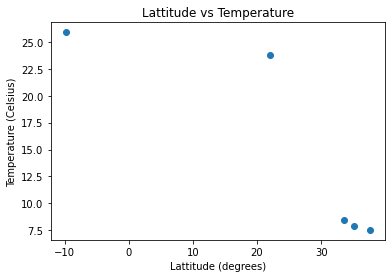

In [68]:
print("clean_city_data") 
print(clean_city_data)
print("************************************************************")
print("Should I convert temp from Celsius to Fahrenheit to make it easier to understand???")
print("using somethink like f_temp=(temp*1.8)+32")
print("If so, do it once up front and replace temp ewith f_temp below") 
print("else have to add conversion for this plus all graphs below")
print("************************************************************")

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()

## Latitude vs. Humidity Plot

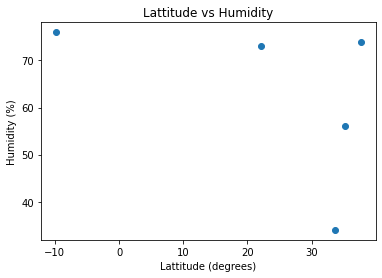

In [69]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('Lattitude vs Humidity')
# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

## Latitude vs. Cloudiness Plot

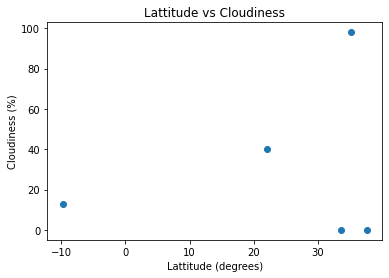

In [70]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('Lattitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

## Latitude vs. Wind Speed Plot

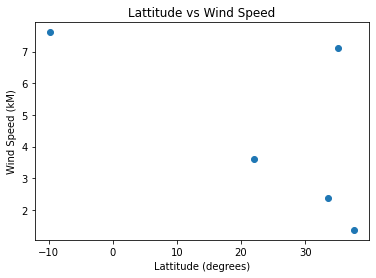

In [71]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('Lattitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

## Linear Regression

The correlation between both factors is -0.86
line_eq is: y = -0.41x + 24.35


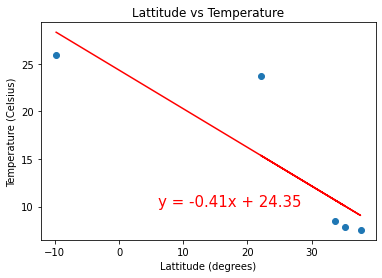

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]



correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [81]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 

city_counter = 0

northern_city_counter = 0
northern_hemisphere_data = []

northern_hemisphere_city = []
northern_hemisphere_lat = []
northern_hemisphere_lon = []
northern_hemisphere_temp = []
northern_hemisphere_humidity = []
northern_hemisphere_clouds = []
northern_hemisphere_wind = []


print("clean_city_data.head(10)")
print(clean_city_data.head(10))
print("len(clean_city_data)")
print(len(clean_city_data))


# Seperate into Northen Hemisphere or Southern Hemisphere
#for city in clean_city_data:
for city_counter in range(0, len(clean_city_data)):
    print('clean_city_data["city"][city_counter]')
    print(clean_city_data["city"][city_counter])
    print('clean_city_data["lat"][city_counter]')
    print(clean_city_data["lat"][city_counter])
    if clean_city_data["lat"][city_counter] >= 0:
        print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        print(f'Lattitude for city {city[city_counter]} #{city_counter} is Northen Hemisphere: {clean_city_data["lat"][city_counter]}')
        # Create new DataFrames 
        # x_values = 
        # y_values = clean_city_data["temp"]
        northern_hemisphere_city.append(clean_city_data["city"][city_counter])
        northern_hemisphere_lat.append(clean_city_data["lat"][city_counter])
        northern_hemisphere_lon.append(clean_city_data["lon"][city_counter])
        northern_hemisphere_temp.append(clean_city_data["temp"][city_counter])
        northern_hemisphere_humidity.append(clean_city_data["Humidity"][city_counter])
        northern_hemisphere_clouds.append(clean_city_data["Cloudiness"][city_counter])
        northern_hemisphere_wind.append(clean_city_data["Wind Speed"][city_counter])
        northern_city_counter += 1
    city_counter+=1
 
print("clean_city_data.dtypes")
print(clean_city_data.dtypes)

print("northern_hemisphere_lat")
print(northern_hemisphere_lat)
print()

x_values = float(northern_hemisphere_lat)
y_values = float(northern_hemisphere_temp)

print("northern_hemisphere_lat.dtypes")
print(northern_hemisphere_lat.dtypes)
print()
print("northern_hemisphere_temp.dtypes")
print(northern_hemisphere_temp.dtypes)
print()

print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

clean_city_data.head(10)
   index      city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0      0    atuona  -9.8000 -139.0333  25.89        76          13        7.61
1      1  katsuura  35.1333  140.3000   7.86        56          98        7.12
2      4     kapaa  22.0752 -159.3190  23.76        73          40        3.60
3      5     baena  37.6167   -4.3225   7.54        74           0        1.37
4      7     tabas  33.5959   56.9244   8.50        34           0        2.39
len(clean_city_data)
5
clean_city_data["city"][city_counter]
atuona
clean_city_data["lat"][city_counter]
-9.8
clean_city_data["city"][city_counter]
katsuura
clean_city_data["lat"][city_counter]
35.1333
The latitude information for city index #1 received is: [-9.8, 35.1333, -24.7911, -34.4187, 22.0752, 37.6167, 60.7161, 33.5959, -22.9661, 59.7035]
Lattitude for city n #1 is Northen Hemisphere: 35.1333
clean_city_data["city"][city_counter]
kapaa
clean_city_data["lat"][city_counter]
22.0752
The lati

TypeError: float() argument must be a string or a number, not 'list'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:

city_counter = 0
southern_city_counter = 0
southern_hemisphere_city = []
southern_hemisphere_lat = []
southern_hemisphere_lon = []
southern_hemisphere_temp = []
southern_hemisphere_humidity = []
southern_hemisphere_clouds = []
southern_hemisphere_wind = []

for city_counter in range(0, len(clean_city_data)):
    if clean_city_data["lat"][city_counter] < 0:
        #print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        print(f'Lattitude for city {city[city_counter]} #{city_counter} is Southern Hemisphere: {clean_city_data["lat"][city_counter]}')
        # Create a new DataFrame 
        southern_hemisphere_city.append(clean_city_data["city"][city_counter])
        southern_hemisphere_lat.append(clean_city_data["lat"][city_counter])
        southern_hemisphere_lon.append(clean_city_data["lon"][city_counter])
        southern_hemisphere_temp.append(clean_city_data["temp"][city_counter])
        southern_hemisphere_humidity.append(clean_city_data["Humidity"][city_counter])
        southern_hemisphere_clouds.append(clean_city_data["Cloudiness"][city_counter])
        southern_hemisphere_wind.append(clean_city_data["Wind Speed"][city_counter])
        southern_city_counter += 1
    city_counter+=1
print("southern_hemisphere_lat")
print(southern_hemisphere_lat)
print()

Lattitude for city i #0 is Southern Hemisphere: -9.8
southern_hemisphere_lat
[-9.8]



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression